# Pollution In India

## Importing Relevant Libraries

In [183]:
#Relevant Analysis Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm

#Relevant Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d

#Relevant Preprocessing Libraries
from sklearn.model_selection import train_test_split

#Setting Seaborn as Default Visualization Libraries
sns.set()

## Loading Data

In [184]:
#Reading .csv file and saving as data_raw
data_raw = pd.read_csv('C:\\Users\\DELL\\Desktop\\Data_Akshay\\pollution_india_2010.csv')

## 1. Exploring and Visualizing the Loaded Data

## 1.1. Data Exploration

In [185]:
#Exploring the Head Rows in the Data Set
data_raw.head(10)

,City,NO2,PM10,SO2,State
0,Chitoor,9,39,4,Andhra Pradesh
1,Guntur,11,81,2,Andhra Pradesh
2,Hydrabad,24,79,5,Andhra Pradesh
3,Kothagudem,11,62,2,Andhra Pradesh
4,Kurnool,9,85,4,Andhra Pradesh
5,Nalgonda,23,85,5,Andhra Pradesh
6,Nellore,12,65,2,Andhra Pradesh
7,Patencheru,23,76,11,Andhra Pradesh
8,Ramagundam,12,68,4,Andhra Pradesh
9,Tirupati,9,37,4,Andhra Pradesh


In [186]:
#Exploring the Tail Rows in the Data Set
data_raw.tail(10)

,City,NO2,PM10,SO2,State
171,Rishikesh,Null,212,Null,Uttarakhand
172,Asansol,66,141,8,West Bengal
173,Barrackpore,74,121,12,West Bengal
174,Durgapur,66,141,8,West Bengal
175,Haldia,52,57,14,West Bengal
176,Howrah,75,118,12,West Bengal
177,Kolkata,62,99,11,West Bengal
178,Raniganj,63,159,8,West Bengal
179,Sankrail,65,100,10,West Bengal
180,South Suburban,56,82,7,West Bengal


In [187]:
#Exploring the Columns in the Data Set
data_raw.columns

Index(['City', 'NO2', 'PM10', 'SO2', 'State'], dtype='object')

In [188]:
#Exploring the Data Types in the Data Set
data_raw.dtypes

City     object
NO2      object
PM10     object
SO2      object
State    object
dtype: object

In [189]:
#Exploring the Discrete Statistics of the Data Set
data_raw.describe(include= 'all')

,City,NO2,PM10,SO2,State
count,181,181,181,181,181
unique,181,54,113,29,29
top,Vishakhapatnam,15,76,2,Maharashtra
freq,1,10,6,24,19


# 2. Feature Engineering

## 2.1. Dealing with Missing Values

In [190]:
#Checking for Null Values in the Data Set
data_raw.isnull().sum()

City     0
NO2      0
PM10     0
SO2      0
State    0
dtype: int64

In [191]:
data_raw.tail(10)

,City,NO2,PM10,SO2,State
171,Rishikesh,Null,212,Null,Uttarakhand
172,Asansol,66,141,8,West Bengal
173,Barrackpore,74,121,12,West Bengal
174,Durgapur,66,141,8,West Bengal
175,Haldia,52,57,14,West Bengal
176,Howrah,75,118,12,West Bengal
177,Kolkata,62,99,11,West Bengal
178,Raniganj,63,159,8,West Bengal
179,Sankrail,65,100,10,West Bengal
180,South Suburban,56,82,7,West Bengal


### Onservations
1. Few missing values are entered as Null, it must be adressed in order to get the clean data.

In [192]:
#Adressing all the missing values entered as Null
data_raw['NO2'] = pd.to_numeric(data_raw['NO2'], errors= 'coerce')
data_raw['PM10'] = pd.to_numeric(data_raw['PM10'], errors= 'coerce')
data_raw['SO2'] = pd.to_numeric(data_raw['SO2'], errors= 'coerce')

In [193]:
data_raw.isnull().sum()

City     0
NO2      4
PM10     1
SO2      5
State    0
dtype: int64

In [194]:
data_raw.tail(10)

,City,NO2,PM10,SO2,State
171,Rishikesh,NaN,212.0,NaN,Uttarakhand
172,Asansol,66.0,141.0,8.0,West Bengal
173,Barrackpore,74.0,121.0,12.0,West Bengal
174,Durgapur,66.0,141.0,8.0,West Bengal
175,Haldia,52.0,57.0,14.0,West Bengal
176,Howrah,75.0,118.0,12.0,West Bengal
177,Kolkata,62.0,99.0,11.0,West Bengal
178,Raniganj,63.0,159.0,8.0,West Bengal
179,Sankrail,65.0,100.0,10.0,West Bengal
180,South Suburban,56.0,82.0,7.0,West Bengal


In [195]:
data_raw.mean()

NO2      24.112994
PM10    108.111111
SO2       9.971591
dtype: float64

In [196]:
data_raw.median()

NO2     20.0
PM10    89.5
SO2      7.5
dtype: float64

In [197]:
data_with_no_mv = data_raw.fillna({'NO2': data_raw['NO2'].median(), 'PM10': data_raw['PM10'].median(), 'SO2': data_raw['SO2'].median()})

In [198]:
data_with_no_mv.isnull().sum()

City     0
NO2      0
PM10     0
SO2      0
State    0
dtype: int64

In [199]:
data_with_no_mv.tail(10)

,City,NO2,PM10,SO2,State
171,Rishikesh,20.0,212.0,7.5,Uttarakhand
172,Asansol,66.0,141.0,8.0,West Bengal
173,Barrackpore,74.0,121.0,12.0,West Bengal
174,Durgapur,66.0,141.0,8.0,West Bengal
175,Haldia,52.0,57.0,14.0,West Bengal
176,Howrah,75.0,118.0,12.0,West Bengal
177,Kolkata,62.0,99.0,11.0,West Bengal
178,Raniganj,63.0,159.0,8.0,West Bengal
179,Sankrail,65.0,100.0,10.0,West Bengal
180,South Suburban,56.0,82.0,7.0,West Bengal


In [200]:
data_with_no_mv.describe(include= 'all')

,City,NO2,PM10,SO2,State
count,181,181.000000,181.000000,181.000000,181
unique,181,NaN,NaN,NaN,29
top,Vishakhapatnam,NaN,NaN,NaN,Maharashtra
freq,1,NaN,NaN,NaN,19
mean,NaN,24.022099,108.008287,9.903315,NaN
std,NaN,14.546460,60.762115,8.186221,NaN
min,NaN,5.000000,27.000000,2.000000,NaN
25%,NaN,15.000000,65.000000,5.000000,NaN
50%,NaN,20.000000,89.500000,7.500000,NaN
75%,NaN,29.000000,135.000000,13.000000,NaN


In [201]:
data_with_no_mv[['NO2', 'PM10', 'SO2']] = data_with_no_mv[['NO2', 'PM10', 'SO2']].astype('int')
data_with_no_mv[['City', 'State']] = data_with_no_mv[['City', 'State']].astype('str')

In [202]:
data_with_no_mv.dtypes

City     object
NO2       int32
PM10      int32
SO2       int32
State    object
dtype: object

In [203]:
data_with_no_mv

,City,NO2,PM10,SO2,State
0,Chitoor,9,39,4,Andhra Pradesh
1,Guntur,11,81,2,Andhra Pradesh
2,Hydrabad,24,79,5,Andhra Pradesh
3,Kothagudem,11,62,2,Andhra Pradesh
4,Kurnool,9,85,4,Andhra Pradesh
...,...,...,...,...,...
176,Howrah,75,118,12,West Bengal
177,Kolkata,62,99,11,West Bengal
178,Raniganj,63,159,8,West Bengal
179,Sankrail,65,100,10,West Bengal


In [204]:
data_grouped = data_with_no_mv.groupby(['State'], as_index=False).sum()

In [205]:
data_grouped

,State,NO2,PM10,SO2
0,Andhra Pradesh,183,893,60
1,Assam,177,834,74
2,Bihar,40,181,7
3,Chandigarh,16,92,2
4,Chattisgarh,105,591,45
5,Dadra and Nagar Haveli,18,39,7
6,Daman and Diu,18,35,7
7,Delhi,55,261,5
8,Goa,217,893,118
9,Gujarat,166,621,105


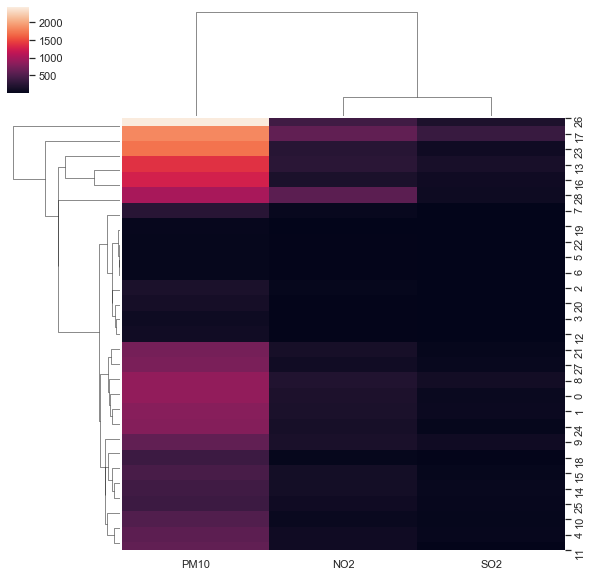

In [206]:
sns.clustermap(data_grouped[['NO2', 'SO2', 'PM10']], method='single')

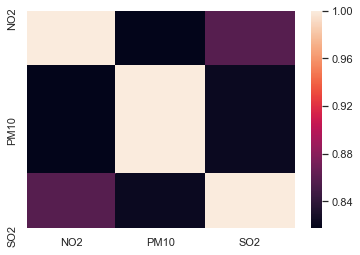

In [207]:
sns.heatmap(data_grouped.corr())

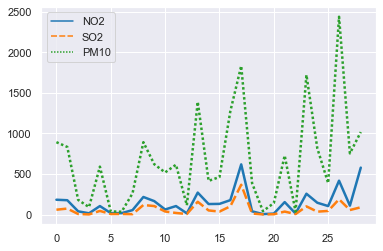

In [208]:
sns.lineplot(data=data_grouped[['NO2', 'SO2', 'PM10']],palette='tab10', linewidth=2.5)

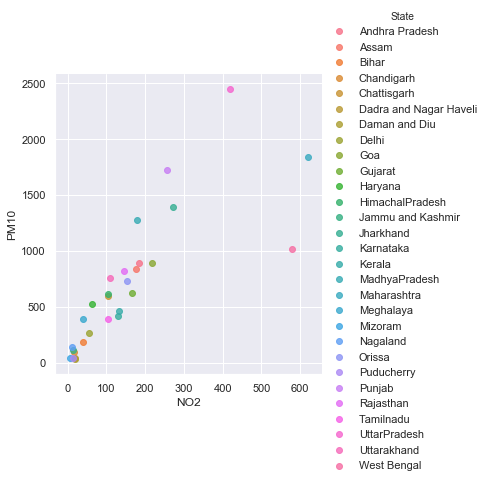

In [209]:
sns.lmplot(x='NO2', y='PM10', hue='State', data=data_grouped, truncate=True)

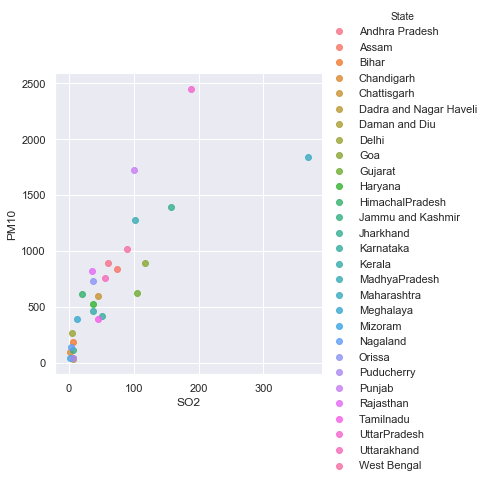

In [210]:
sns.lmplot(x='SO2', y='PM10', hue='State', data=data_grouped, truncate=True)

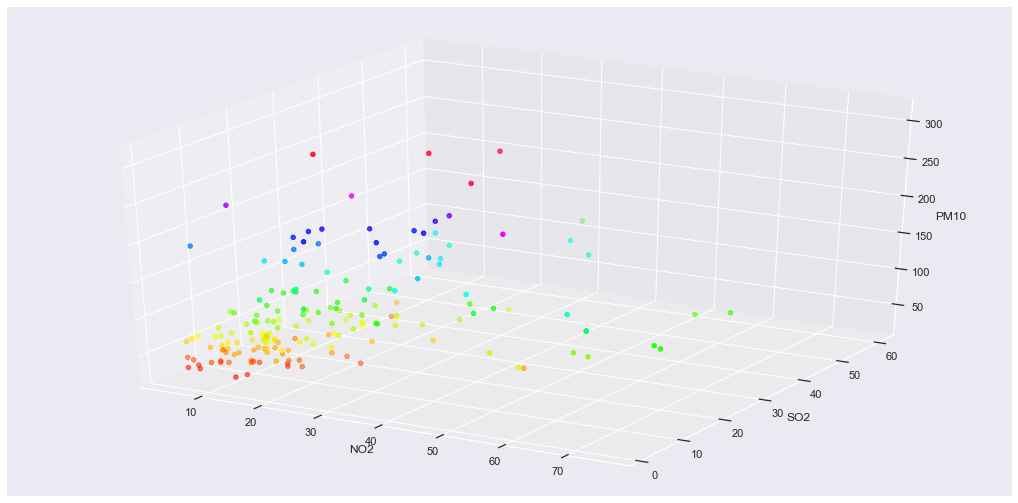

In [211]:
fig = plt.figure(figsize = (18, 9))
ax = plt.axes(projection='3d')

xs = data_with_no_mv['NO2']
ys = data_with_no_mv['SO2']
zs = data_with_no_mv['PM10']

ax.scatter3D(xs, ys, zs, c=zs, cmap='hsv')

ax.set_xlabel('NO2')
ax.set_ylabel('SO2')
ax.set_zlabel('PM10')

plt.show()

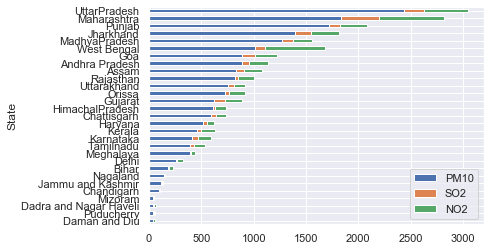

In [212]:
data_grouped.sort_values(by='PM10').set_index('State')[['PM10', 'SO2', 'NO2']].plot(kind='barh', stacked=True)

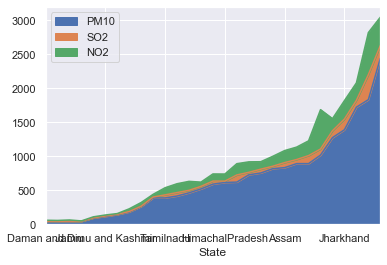

In [213]:
data_grouped.sort_values(by='PM10').set_index('State')[['PM10', 'SO2', 'NO2']].plot(kind='area')

In [214]:
def statewise_data(state_name):
    try:
        return data_with_no_mv[data_with_no_mv['State'] == state_name]
    
    except Exception as e:
        return e

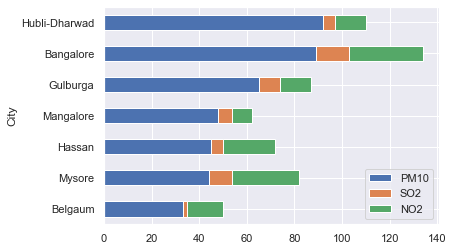

In [215]:
statewise_data('Karnataka').sort_values(by='PM10').set_index('City')[['PM10', 'SO2', 'NO2']].plot(kind='barh', stacked=True)

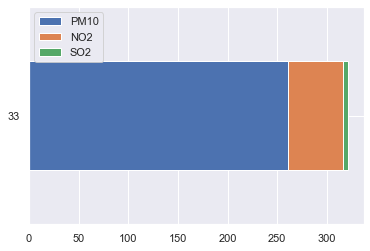

In [216]:
statewise_data('Delhi')[['PM10', 'NO2', 'SO2']].plot(kind='barh', stacked=True)

In [243]:
targets = pd.Categorical(data_with_no_mv['State']).codes
features = data_with_no_mv.drop(['State', 'City'], axis=1)

In [251]:
targets

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  4,  4,  4,  4,  5,  6,  7,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 13, 13, 13, 13, 13, 13,
       13, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18,
       18, 19, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 22, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25,
       26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27,
       27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28], dtype=int8)

In [244]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=29)

kmeans.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=29, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [245]:
kmeans.cluster_centers_

array([[ 12.22222222,  69.22222222,   4.27777778],
       [ 33.25      , 208.75      ,  10.        ],
       [ 22.08333333, 117.41666667,  10.83333333],
       [ 40.        , 289.5       ,  22.5       ],
       [  9.92307692,  36.        ,   3.38461538],
       [ 34.55555556, 171.11111111,  14.22222222],
       [ 30.5       ,  89.75      ,  17.5       ],
       [ 58.25      ,  92.5       ,   9.25      ],
       [ 65.        , 147.        ,   8.        ],
       [ 14.57142857,  85.42857143,   5.07142857],
       [ 18.        , 253.        ,   9.        ],
       [ 25.42857143,  76.28571429,  16.        ],
       [ 70.5       , 109.        ,  31.5       ],
       [ 17.16666667,  46.75      ,   6.5       ],
       [ 35.        , 227.75      ,  14.5       ],
       [ 30.        , 119.        ,  60.        ],
       [ 22.57142857, 137.28571429,   7.        ],
       [ 17.33333333, 187.66666667,   6.5       ],
       [ 17.38461538,  99.84615385,   8.38461538],
       [ 74.5       , 119.5    

In [248]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(targets, kmeans.labels_))
print(classification_report(targets, kmeans.labels_))

[[4 0 0 0 2 0 0 0 0 3 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [4 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 2 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 1 0 0 0 0]
 [1 0 0 0 1 0 1 0 0 1 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0]
 [1 0 1 0 0 0 1 0 0 2 0 